In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import glob
from google.colab import drive
import cv2 
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from PIL import Image
import skimage.io as io
import imageio
import os


In [0]:
name_dalmatian = glob.glob(os.path.join('dogs','dalmatian'.'*.jpg'))
name_golden = glob.glob(os.path.join('dogs','golden','*.jpg'))
dataset = name_dalmatian + name_golden

In [0]:
def get_data(dataset, mode):
  if mode == 'train':
    name_train_dalmatian = []
    for name in name_dalmatian:
      file = name.split('/')[-1].replace('.jpg','')
      if int(file) % 2==0:
        name_train_dalmatian.append(name)

    name_train_golden = []
    for name in name_golden:
      file = name.split('/')[-1].replace('.jpg','')
      if int(file) % 2==0:
        name_train_golden.append(name)
  else:
    name_train_dalmatian = []
    for name in name_dalmatian:
      file = name.split('/')[-1].replace('.jpg','')
      if int(file) % 2!=0:
        name_train_dalmatian.append(name)

    name_train_golden = []
    for name in name_golden:
      file = name.split('/')[-1].replace('.jpg','')
      if int(file) % 2!=0:
        name_train_golden.append(name)
  return name_train_dalmatian+name_train_golden

In [0]:
name_dogs_train = get_data(dataset, 'train')
name_dogs_test = get_data(dataset, 'test')

In [0]:
imagenes_train = []
for file in name_dogs_train:
  img_train = plt.imread(file)
  imagenes_train.append(img_train)

imagenes_test = []
for file in name_dogs_test:
  img_test = plt.imread(file)
  imagenes_test.append(img_test)  

In [0]:
def get_histograms(imagenes_set, num_bins):
  histograms = []
  for i in imagenes_train:
    img_BGR = cv2.cvtColor(i,cv2.COLOR_RGB2BGR)
    img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
    (hist, _) = np.histogram(img_GRAY.ravel(), bins = num_bins)
    # normalize the histogram, such that it sums to one
    hist = hist.astype("int")
    #hist /= hist.sum()
    histograms.append(hist)
  return np.array(histograms)

In [0]:
hist_train_100 = get_histograms(imagenes_train, 100)
hist_test_100 = get_histograms(imagenes_test, 100)
hist_train_50 = get_histograms(imagenes_train, 50)
hist_train_10 = get_histograms(imagenes_train, 10)


In [0]:
kmeans100 = KMeans(n_clusters=2, random_state=0).fit(hist_train_100)
labels100 = kmeans100.labels_
predicted_labels = kmeans100.predict(hist_test_100)

kmeans50 = KMeans(n_clusters=2, random_state=0).fit(hist_train_50)
labels50 = kmeans50.labels_

kmeans10 = KMeans(n_clusters=2, random_state=0).fit(hist_train_10)
labels10 = kmeans10.labels_

In [0]:
def make_plots(images, labels, num_bins):
  images = np.array(images)
  imgs_1 = images[labels==1]
  cont1 = 0
  cont1hist = 0
  imgs_0 = images[labels==0]
  cont0 = 0
  cont0hist = 0
  fig = plt.figure(figsize=(10,7))
  maximun = max(imgs_1.shape[0], imgs_0.shape[0])
  for num in range(1,(maximun*4)+1):
    if num <=maximun:
      if cont1<imgs_1.shape[0]:
        ax = fig.add_subplot(4,maximun,num)
        ax.imshow(imgs_1[cont1])
        ax.axis('off')
        ax.set_title('label 1')
        cont1 += 1
      else:
        continue
    elif num>maximun and num<=maximun*2:
      if cont1hist<imgs_1.shape[0]:
        ax = fig.add_subplot(4,maximun,num)
        img_BGR = cv2.cvtColor(imgs_1[cont1hist],cv2.COLOR_RGB2BGR)
        img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
        ax.hist(img_GRAY.ravel(), bins = num_bins)
        cont1hist += 1
      else:
        continue
    elif num>maximun*2 and num<=maximun*3:
      if cont0<imgs_0.shape[0]:
        ax = fig.add_subplot(4,maximun,num)
        ax.imshow(imgs_0[cont0])
        ax.axis('off')
        ax.set_title('label 0')
        cont0 += 1
      else:
        continue
    else:
      if cont0hist<imgs_0.shape[0]:
        ax = fig.add_subplot(4,maximun,num)
        img_BGR = cv2.cvtColor(imgs_0[cont0hist],cv2.COLOR_RGB2BGR)
        img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
        ax.hist(img_GRAY.ravel(), bins = num_bins)
        cont0hist += 1
      else:
        continue  
  plt.tight_layout()
  plt.savefig('./bins{}.jpg'.format(str(num_bins)), transparent= False, bbox_inches='tight', pad_inches=0)
  plt.show()
  
  

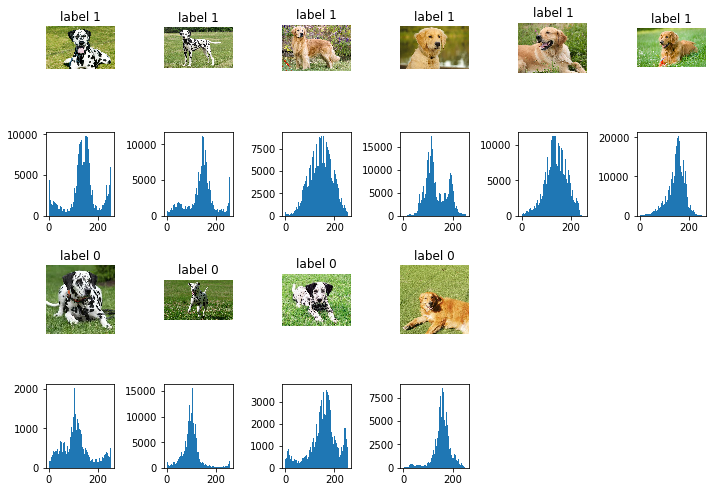

In [0]:
make_plots(imagenes_train, labels100, 100)

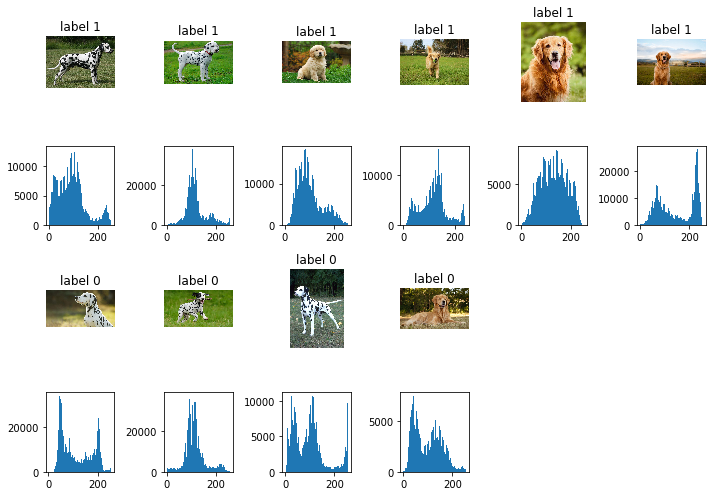

In [0]:
make_plots(imagenes_test, predicted_labels, 100)

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(10,10))
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
          if i == 0:
            ax.text(j, i+0.2, format(cm[i, j], fmt),
                    horizontalalignment="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
          else: 
            ax.text(j, i-0.2, format(cm[i, j], fmt),
                    horizontalalignment="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig('./confusion_mat{}.jpg'.format(str(normalize)), transparent= False, bbox_inches='tight', pad_inches=0)
    return ax

Confusion matrix, without normalization
[[3 2]
 [1 4]]
Normalized confusion matrix
[[0.6 0.4]
 [0.2 0.8]]


<Figure size 720x720 with 0 Axes>

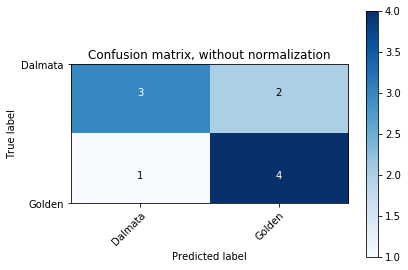

<Figure size 720x720 with 0 Axes>

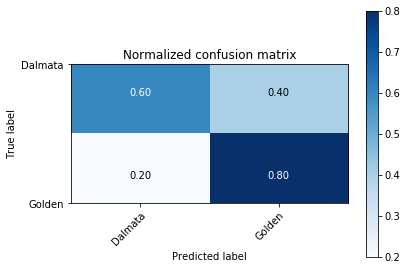

In [0]:
y_test = [0,0,0,0,0,1,1,1,1,1] 
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predicted_labels, classes=np.array(['Dalmata', 'Golden']),
                      title=None)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predicted_labels, classes=np.array(['Dalmata', 'Golden']), normalize=True,
                      title=None)

plt.show()

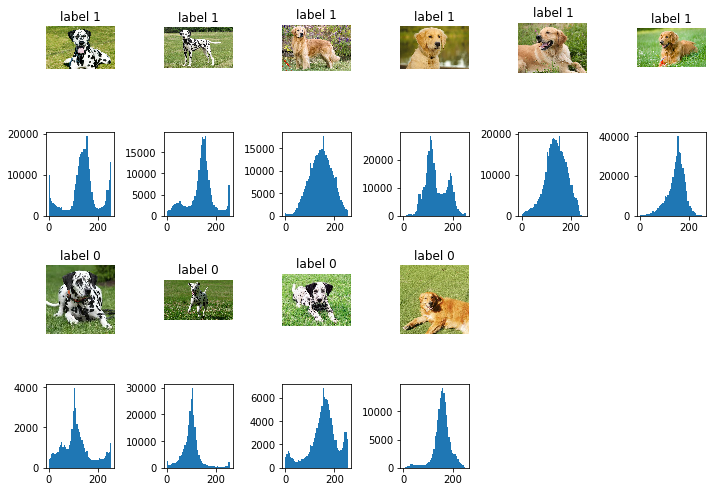

In [0]:
make_plots(imagenes_train, labels50, 50)

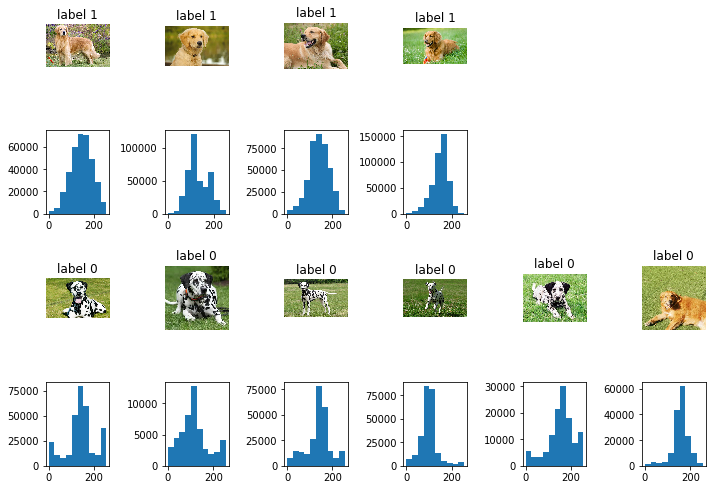

In [0]:
make_plots(imagenes_train, labels10, 10)

## Punto 2. Segmentación por cuantificación vectorial.


In [0]:
duck_img = glob.glob(os.path.join('video','*.jpg'))

In [0]:
def get_gray(imagenes_set):
  gray_image = []
  for i in imagenes_set:
    img_BGR = cv2.imread(i)
    img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
    gray_image.append(img_GRAY)
  return np.array(gray_image)

In [0]:
gray_ducks = get_gray(duck_img)
gray_ducks.shape

(80, 480, 854)

In [0]:
def MyVQ_training_2016719749_201126292(grayscale_image, window_size, K):
  offset = window_size//2
  vects = []
  labeled_image = np.zeros_like(grayscale_image, np.int)
  for row in range(grayscale_image.shape[0]-(offset*2)):
    for column in range(grayscale_image.shape[1]-(offset*2)):
      window = grayscale_image[row:window_size+row,column:window_size+column]
      vect_column = window.reshape( window_size**2)
      vects.append(vect_column)
  vects = np.array(vects)
  model = KMeans(n_clusters=K, random_state=0).fit(vects)
  labels = model.labels_
  cont = 0
  for row in range(grayscale_image.shape[0]-(offset*2)):
    for column in range(grayscale_image.shape[1]-(offset*2)):
      labeled_image[row:window_size+row,column:window_size+column] = labels[cont]
      cont += 1
  return model, labeled_image

In [0]:
def MyVQ_predict_2016719749_201126292(grayscale_image, window_size, model):
  offset = window_size//2
  vects = []
  labeled_image = np.zeros_like(grayscale_image, np.int)
  for row in range(grayscale_image.shape[0]-(offset*2)):
    for column in range(grayscale_image.shape[1]-(offset*2)):
      window = grayscale_image[row:window_size+row,column:window_size+column]
      vect_column = window.reshape( window_size**2)
      vects.append(vect_column)
  vects = np.array(vects)
  labels = model.predict(vects)
  cont = 0
  for row in range(grayscale_image.shape[0]-(offset*2)):
    for column in range(grayscale_image.shape[1]-(offset*2)):
      labeled_image[row:window_size+row,column:window_size+column] = labels[cont]
      cont += 1
  return labeled_image

## Testing function
Each file correspond of pixel value and its neighboors


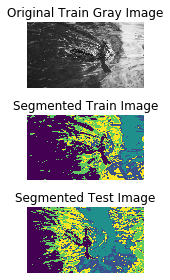

In [0]:
model, segmeted = MyVQ_training_2016719749_201126292(gray_ducks[0], 5, 5)
test = MyVQ_predict_2016719749_201126292(gray_ducks[30], 5, model)
plt.subplot(3,1,1)
plt.imshow(gray_ducks[0], cmap='gray')
plt.title('Original Train Gray Image')
plt.axis('off')
plt.subplot(3,1,2)
plt.title('Segmented Train Image')
plt.axis('off')
plt.imshow(segmeted)
plt.subplot(3,1,3)
plt.title('Segmented Test Image')
plt.axis('off')
plt.imshow(test)
plt.tight_layout()
plt.savefig('./report.jpg', transparent= False, bbox_inches='tight', pad_inches=0)

In [0]:
imagenes_prueba = []
for i in range(6):
  A = MyVQ_predict_2016719749_201126292(gray_ducks[i*5], 5, model)
  imagenes_prueba.append(A)

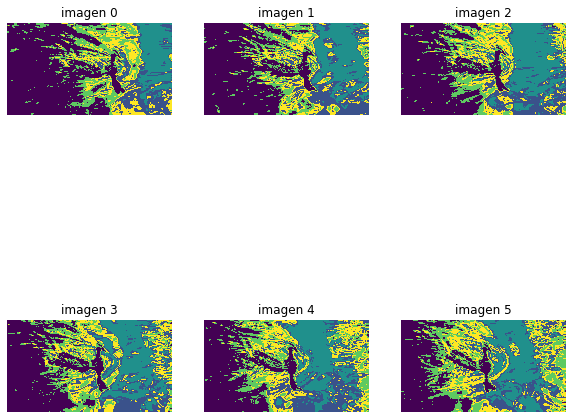

In [0]:
fig = plt.figure(figsize=(10,10))
temp= 0
for num in range(1,7):
  ax = fig.add_subplot(2,3,num)
  ax.imshow(imagenes_prueba[temp])
  ax.axis('off')
  ax.set_title('imagen {}'.format(temp))
  temp += 1
fig.savefig('./testing.jpg', transparent= False, bbox_inches='tight', pad_inches=0)

## Segmentation of all video

In [0]:
for i in range(gray_ducks.shape[0]):
  A = MyVQ_predict_2016719749_201126292(gray_ducks[i], 5, model)
  rescaled = (255.0 / A.max() * (A - A.min())).astype(np.uint8)
  im = Image.fromarray(rescaled)
  im.save(os.path.join('segmented','segmented_duck{}.jpeg'.format(i))


In [0]:
color = [255,125,0]

prediction = 'segmented'
image_path = 'video'
names = os.listdir(image_path)
names_predictions = os.listdir(prediction)
names.sort()
save_path = 'predictions.gif'
sequence = []
for name, predict in zip(names,names_predictions):
  image = Image.open(os.path.join(image_path,name))
  pred = io.imread(os.path.join(prediction,predict))
  pred = np.array(pred==255, dtype=np.uint8)
  colored_pred = np.tile(np.expand_dims(pred, axis=2),(1,1,3))
  for i in range(3):
    colored_pred[:,:,i] = colored_pred[:,:,i]*color[i] 
  colored_pred = Image.fromarray(colored_pred)
  overlay_image = Image.blend(image,colored_pred,alpha=.4)
  temp = np.array(overlay_image)
  sequence.append(temp)
imageio.mimsave(save_path, sequence, **{'duration':0.1})